## **Advances in Data Mining**

Stephan van der Putten | (s1528459) | stvdputtenjur@gmail.com  
Theo Baart | s2370328 | s2370328@student.leidenuniv.nl

### **Assignment 0**
The target is to find a formula which expresses the number of unique values when generating ` n`  random integers between 0 and a value `N`. This formula will be based on the experimental results computed by testing for multiple values of `n` and `N`.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## **Experiment**

To compute experimental results we run the experiment multiple times for various values of `n` and `N`. Observe that `n is in [1000, 10000]` and that `N is in [1n ... 64n]`. For each unique `(n, N)` combination the experiment will be repeated 10 times. Each repitition has a unique seed.

`unique_values_experiment`  
    This function computes the number of unique values for a randomly generated sequence of `n` values between 0 and `N`. To ensure that each sequences is indeed random a seed is computed based on the product of all of the function's parameters. In order to do this it uses the following parameters:
   * `n` - the length of the sequence to be generated.
   * `N` - the maximum value an item in the sequence may have.
   * `z` - a modifier for the random seed to ensure a unique seed is used in each iteration of the function.

In [2]:
def unique_values_experiment(n, N, z):
    np.random.seed(n*N*z)
    random_values = np.random.randint(0, N*n, n)
    experiment = len(np.unique(random_values))
    return experiment

The `unique_values_experiment` function is executed multiple times to build a list of experimental results. For this experiment we test on lists of 1000 and 10000 items and test for values of `N` between 1 and 65. For each unique combination of `n` and `N` we repeat the function 10 times, each time with a different value for `z`. 

In [3]:
r_exp = []
n = np.array([1000, 10000])
N = np.array([x for x in range(1, 65)])
for x in n:
    r_n = []
    for y in N:
        for z in range(10):
            num_unique = unique_values_experiment(x, y, z)
            r_n.append(num_unique)
    r_exp.append(r_n)   

The results of the experiment can be plotted into the following graphs.

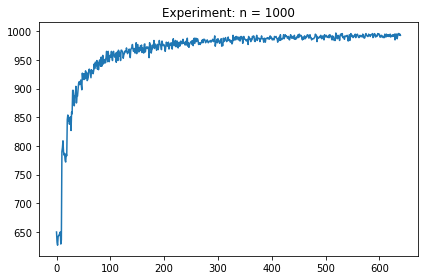

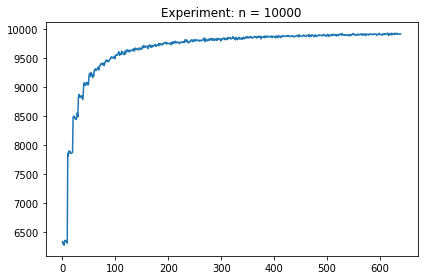

In [4]:
plt.title('Experiment: n = 1000')
plt.plot(r_exp[0])
plt.tight_layout()
plt.show()

plt.title('Experiment: n = 10000')
plt.plot(r_exp[1])
plt.tight_layout()
plt.show()

## **Our Formula**

We can generalize the experimental results into the following formula:
```
unique_values(n,N) = n - (n - N(1 - ((N-1)/N)^n))
```

The above formula is an adaptation of a formula for the birthday collission problem / the hash collision problem.

`unique_values`  
    This function computes the number of unique values by implementing the the formula shown above. In order to do this it uses the following parameters:
   * `n` - the length of the sequence to be generated.
   * `N` - the maximum value an item in the sequence may have.

In [5]:
def unique_values(n, N):
    prediction = n - (n - N*(1 - ((N-1)/N)**n))
    return prediction

We repeat the experiment conducted in the previous section, but this time we use the function `unique_values` instead of `unique_values_experiment` to generate the expected number of unique values for a given combination of `n` and `N`. By using the same experimental setup we can directly compare the accuracy of our formula with the actual experimental results.

In [6]:
r_pred = []
for x in n:
    r_n = []
    for y in N:
        for z in range(10):
            num_unique = unique_values(x, y*x)
            r_n.append(num_unique)
    r_pred.append(r_n)

This formula results in the following graphs.

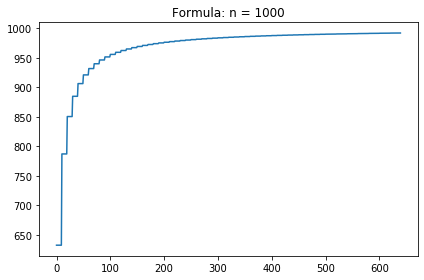

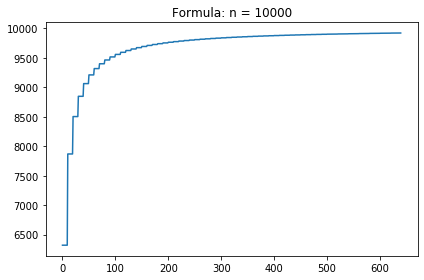

In [7]:
plt.plot(r_pred[0])
plt.title('Formula: n = 1000')
plt.tight_layout()
plt.show()

plt.plot(r_pred[1])
plt.title('Formula: n = 10000')
plt.tight_layout()
plt.show()

## **Comparison**

We can then plot the graphs together to see how the formula aligns to the experimental results.

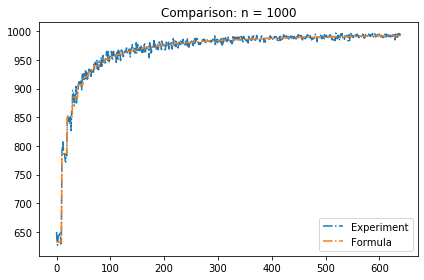

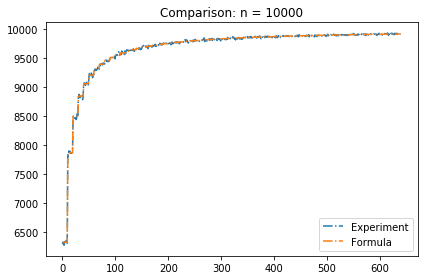

In [8]:
plt.title('Comparison: n = 1000')
plt.plot(r_exp[0],'-.',label="Experiment")
plt.plot(r_pred[0],'-.',label="Formula")
plt.legend()
plt.tight_layout()
plt.show()

plt.title('Comparison: n = 10000')
plt.plot(r_exp[1],'-.',label="Experiment")
plt.plot(r_pred[1],'-.',label="Formula")
plt.legend()
plt.tight_layout()
plt.show()

## **Conclusion**

As seen in the graphs, above the formula we have computed closely matches the experimental values generated in the test. Thus we can conclude that the formula is a good approximation of the number of unique values we can expect in a list of `n` values with a value between 0 and `N`.